# Load the Dataset

In [1]:
# import the data processing and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset in pandas
df_liver=pd.read_csv("liver.csv")

# Quick summary of Dataset

In [3]:
# Access the first five rows from dataset
df_liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Access the last five rows from the dataset
df_liver.tail()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
# retrieve the column information
df_liver.columns.values

array(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin',
       'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos',
       'is_patient'], dtype=object)

In [6]:
# Retrieve the full information of dataset regarding the features and response, in order to verify 
# if the values are unique or are there any missing data.
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Dimension of the dataset

In [7]:
#finding the shape of the dataframe
print(df_liver.shape)

(583, 11)


What we can see here is that the data contains (583 rows by 11 columns). This means the that df_liver contains 583 observations + 10 features + 1 response (or target) variable. The response variable is "Dataset". Furthermore, df_liver consists of 5 Floats, 5 integers and 1 object. Therefore, the goal is to convert the object to numerical values so we can apply machine learning (ML) algorithms. We also notice that the column, 'Albumin_and_Globulin_Ratio' contains missing values (Nan).

In [8]:
# Statistical summary using .describe()

In [9]:
print(df_liver.describe())

              age  tot_bilirubin  direct_bilirubin  tot_proteins      albumin  \
count  583.000000     583.000000        583.000000    583.000000   583.000000   
mean    44.746141       3.298799          1.486106    290.576329    80.713551   
std     16.189833       6.209522          2.808498    242.937989   182.620356   
min      4.000000       0.400000          0.100000     63.000000    10.000000   
25%     33.000000       0.800000          0.200000    175.500000    23.000000   
50%     45.000000       1.000000          0.300000    208.000000    35.000000   
75%     58.000000       2.600000          1.300000    298.000000    60.500000   
max     90.000000      75.000000         19.700000   2110.000000  2000.000000   

          ag_ratio        sgpt        sgot     alkphos  is_patient  
count   583.000000  583.000000  583.000000  579.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.947064    1.286449  
std     288.918529    1.085451    0.795519    0.319592    0.452

From the descriptive statistics above, we notice that the minimum age is 4 and the maximum is 90. Based on the information on this dataset, it was suggested that anyone above the age of 85 should be treated as 90. So we can change that through the creation of a new dataframe. Furthermore, we notice missing values in the column "Albumin_and_Globulin_Ratio", which we can deal with shortly. Lastly, it would be a good idea to figure out the ranges of healthy patients in order to figure out where each patient lies.

# Satistical opeartions on data

In [10]:
df_liver.sum()

age                                                             26087
gender              FemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMale...
tot_bilirubin                                                  1923.2
direct_bilirubin                                                866.4
tot_proteins                                                   169406
albumin                                                         47056
ag_ratio                                                        64078
sgpt                                                           3779.7
sgot                                                           1831.7
alkphos                                                        548.35
is_patient                                                        750
dtype: object

In [11]:
df_liver.mean()

/var/folders/m7/pk43vrzs6lg0wx91hgcx8bxw0000gn/T/ipykernel_1168/2079664606.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_liver.mean()


age                  44.746141
tot_bilirubin         3.298799
direct_bilirubin      1.486106
tot_proteins        290.576329
albumin              80.713551
ag_ratio            109.910806
sgpt                  6.483190
sgot                  3.141852
alkphos               0.947064
is_patient            1.286449
dtype: float64

In [12]:
df_liver.median()

/var/folders/m7/pk43vrzs6lg0wx91hgcx8bxw0000gn/T/ipykernel_1168/2903936268.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_liver.median()


age                  45.00
tot_bilirubin         1.00
direct_bilirubin      0.30
tot_proteins        208.00
albumin              35.00
ag_ratio             42.00
sgpt                  6.60
sgot                  3.10
alkphos               0.93
is_patient            1.00
dtype: float64

In [13]:
df_liver.mode()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,60.0,Male,0.8,0.2,198,25.0,23.0,7.0,3.0,1.0,1.0
1,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,298,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_liver.std()

/var/folders/m7/pk43vrzs6lg0wx91hgcx8bxw0000gn/T/ipykernel_1168/1710450797.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_liver.std()


age                  16.189833
tot_bilirubin         6.209522
direct_bilirubin      2.808498
tot_proteins        242.937989
albumin             182.620356
ag_ratio            288.918529
sgpt                  1.085451
sgot                  0.795519
alkphos               0.319592
is_patient            0.452490
dtype: float64

In [15]:
df_liver.var()

/var/folders/m7/pk43vrzs6lg0wx91hgcx8bxw0000gn/T/ipykernel_1168/942502163.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_liver.var()


age                   262.110702
tot_bilirubin          38.558160
direct_bilirubin        7.887659
tot_proteins        59018.866587
albumin             33350.194438
ag_ratio            83473.916429
sgpt                    1.178205
sgot                    0.632850
alkphos                 0.102139
is_patient              0.204747
dtype: float64

## Selected column statistical operations

In [16]:
df_liver['age'].sum()

26087

In [17]:
df_liver['tot_bilirubin'].mean()

3.298799313893652

In [18]:
df_liver['tot_proteins'].median()

208.0

In [19]:
df_liver['albumin'].mode()

0    25
Name: albumin, dtype: int64

In [20]:
df_liver['direct_bilirubin'].std()

2.8084976176589636

# Cleaning the data

## a) Healthy ranges of the feature results

Healthy Ranges for the 10 feature columns

Total_Bilirubin = 0.1 to 1.2 mg/dL = 1.71 to 20.5 umol/L

Direct_Bilirubin = < 0.3 mg/dL = < 5.1 umol/L

Alkaline_Phosphatase = 44 to 147 IU/L (High levels of ALP are seen in children undergoing growth and pregnant women)

Alamine_Aminotransferase = 29 to 33 IU/L (Age and gender can affect the value)

Aspartate_Aminotransferase = 1 to 45 U/L (Values are slightly lower in females) Total_Proteins = 6.0 to 8.3 g/dL

Albumin = 3.4 to 5.4 g/dL

Albumin_and_Globulin_Ratio = Adult: 3.7 to 5.2 g/dL; Older Adult: 3.2 to 4.6 g/dL; >90 yr: 2.9 to 4.5 g/dL

Note: These values may differ based on the different guidelines or hospitals. The values above were obtained from google.

## b) Dealing with missing values

In [21]:
df_liver.describe(include='all')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [22]:
# Define a function that allows us to create a table of missing values in df_liver and their percentages in 
# descending order
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    percentage_final = (round(percentage, 2) * 100)
    total_percent = pd.concat(objs=[total, percentage_final], axis = 1, keys=['Total', '%'])
    return total_percent

In [23]:
# Find the total count and % of missing values 
missing_values(df_liver)

,Total,%
alkphos,4,1.0
age,0,0.0
gender,0,0.0
tot_bilirubin,0,0.0
direct_bilirubin,0,0.0
tot_proteins,0,0.0
albumin,0,0.0
ag_ratio,0,0.0
sgpt,0,0.0
sgot,0,0.0


It appears that there are only 4 missing values in the feature column alkphos, which equates to 1% of the the entire data.

In [24]:
# Replace missing values with the mean of feature column alkphos, 
# then check to see that it has been successfull, where the sum of missig values should be 0
df_liver['alkphos'].fillna(df_liver['alkphos'].mean(), inplace = True)
df_liver['alkphos'].isnull().sum()

0

In [25]:
# Repeat to see what is the % of missing values
missing_values(df_liver)

,Total,%
age,0,0.0
gender,0,0.0
tot_bilirubin,0,0.0
direct_bilirubin,0,0.0
tot_proteins,0,0.0
albumin,0,0.0
ag_ratio,0,0.0
sgpt,0,0.0
sgot,0,0.0
alkphos,0,0.0


# VISUALIZATION

Data visualization is the representation of data through use of common graphics,such as charts,plots,infographics and animations

### Types of Data Visualization

1. Tables
2. Pie Charts
3. Line Charts and Area Charts
4. Histograms
5. Scatter Plots
6. Heat Maps
7. Tree Maps

# Exploring the Data Visually

Finding any corelation between the features using pairplot in seaborn

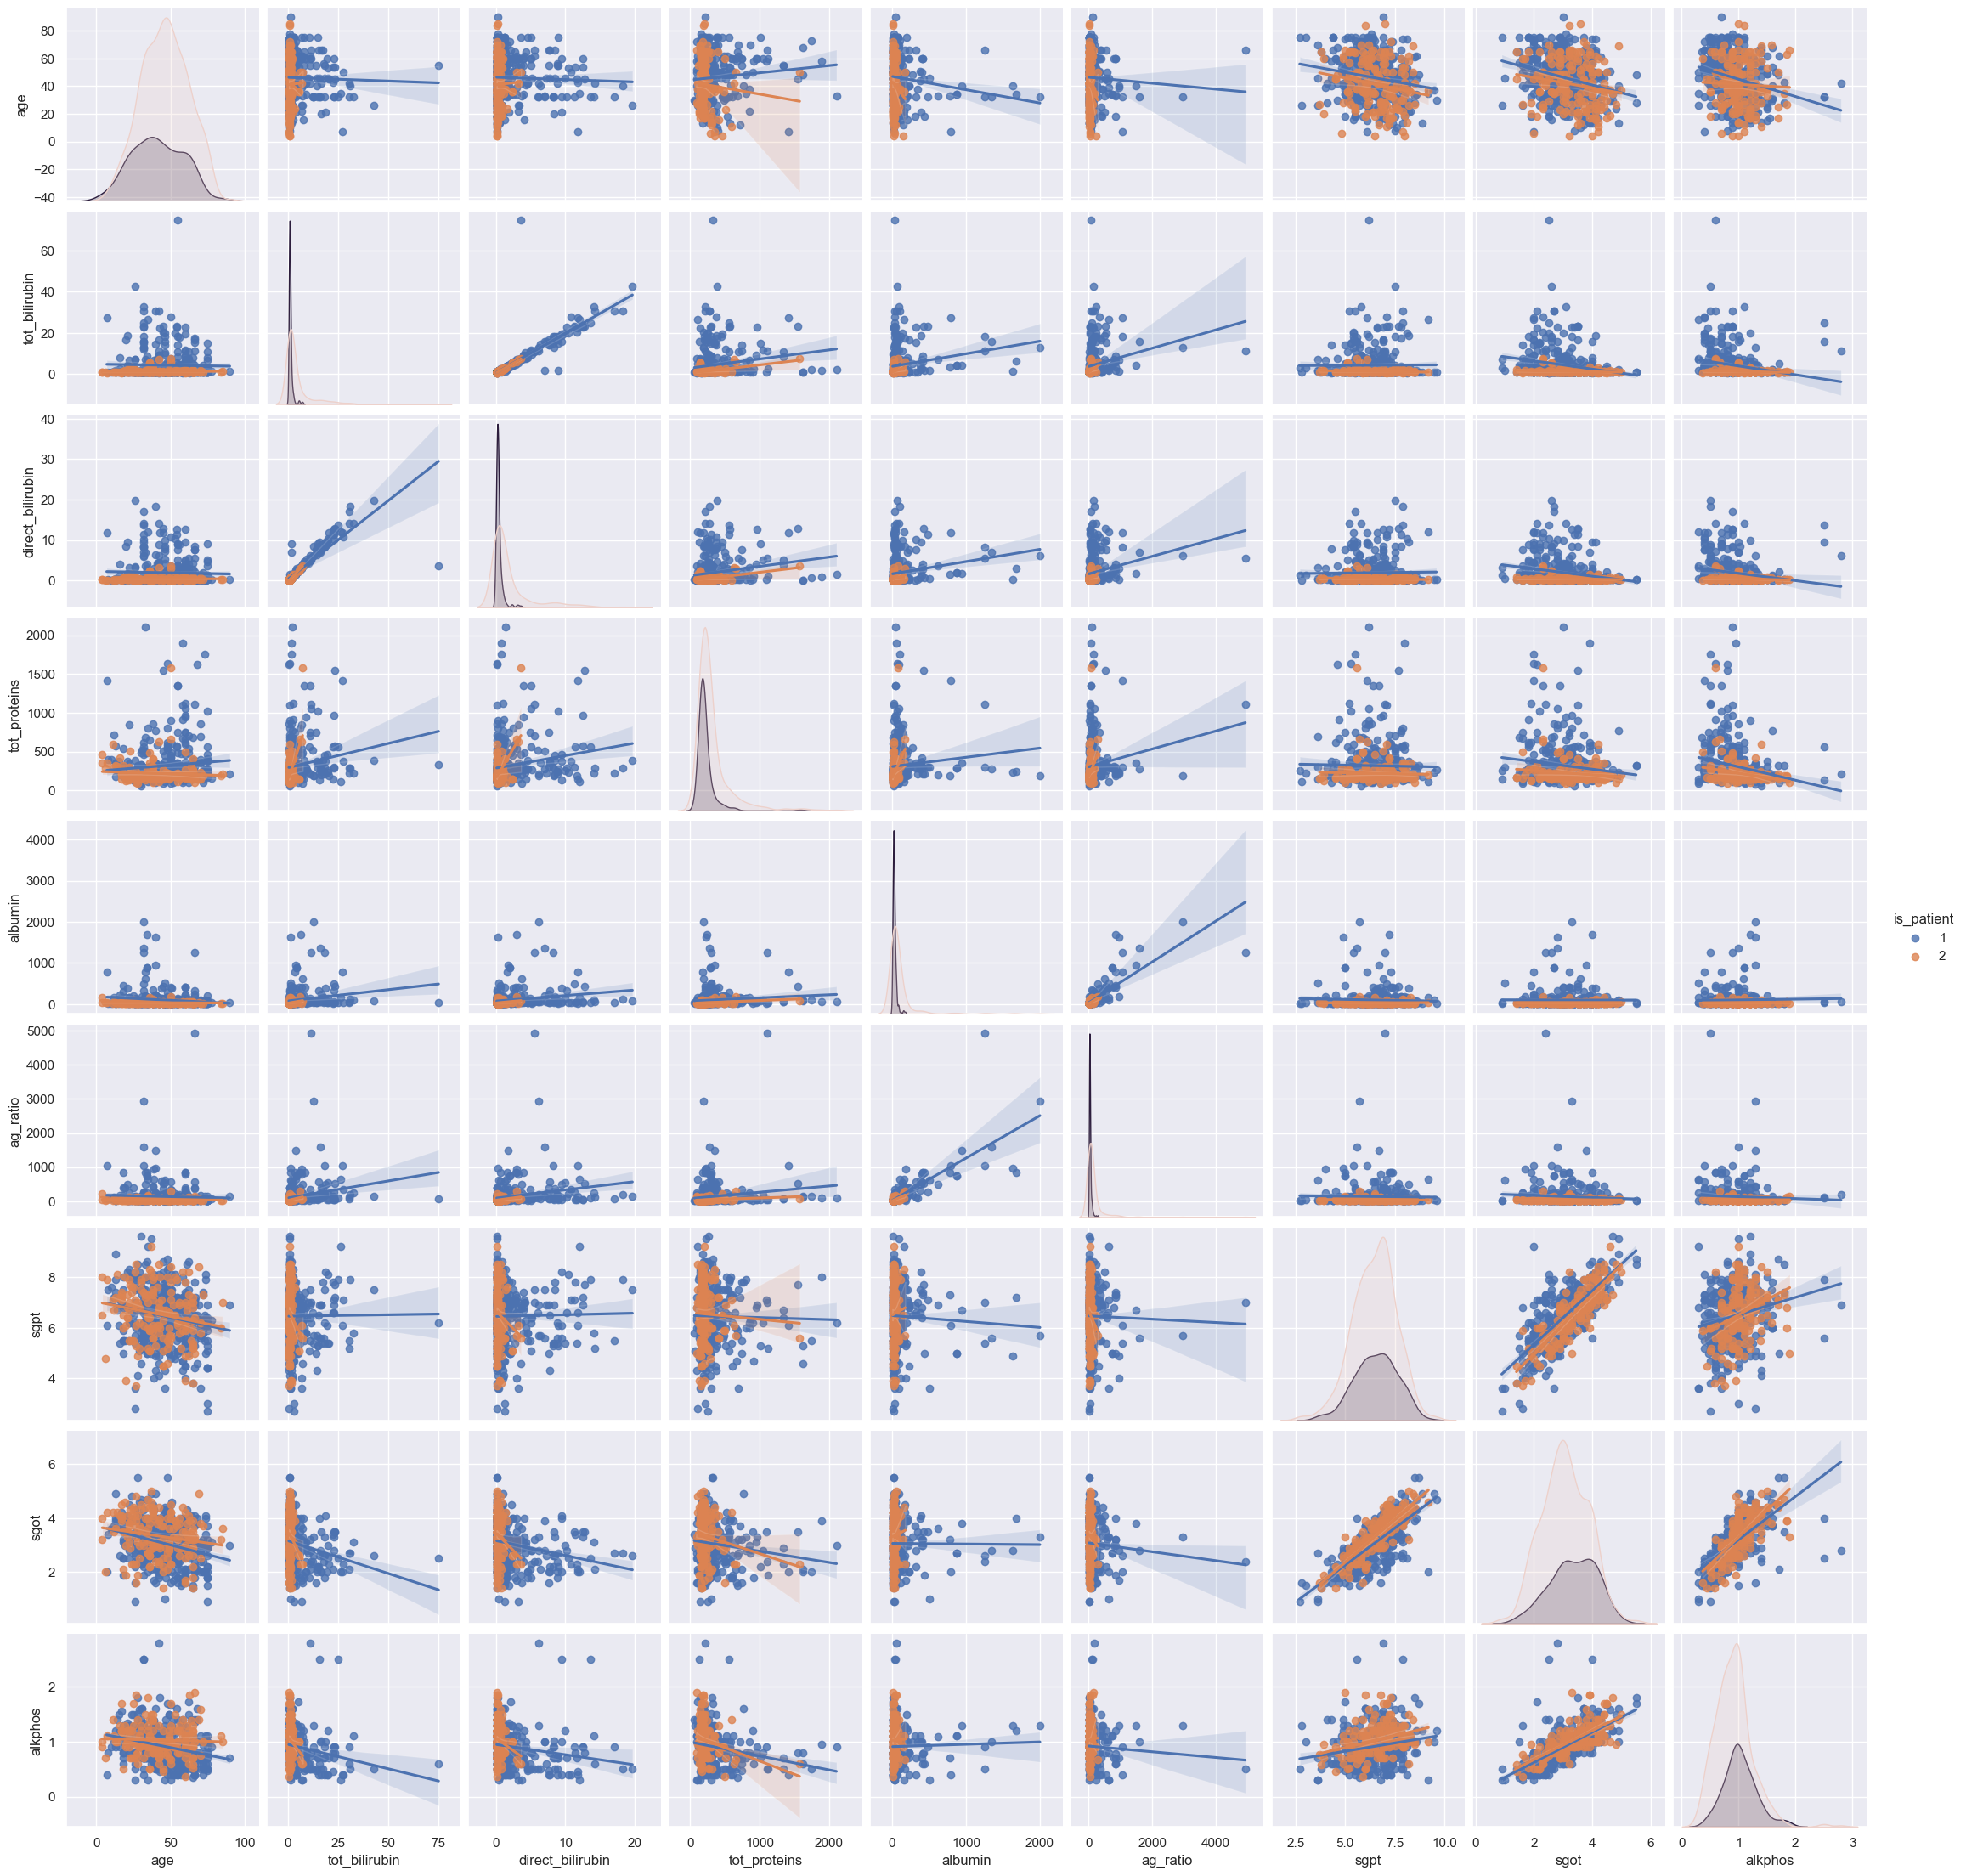

In [26]:
# Corelation Pairplot
sns.set()
sns.pairplot(df_liver,hue='is_patient',kind='reg')

#### Result Analysis:

Based on the correlative pair plots, we find some interesting results directly.

-Positive correlations:

Total Bilirubin and Direct Bilirubin (vice-versa)

Alamine Aminotransferase and Aspartate Aminotransferase (vice-versa)

Total Protein and Albumin (vice-versa)

Albumin and Globulin Ratio and Albumin (vice-versa)

Total Protein and Albumin and Globulin Ration (vice-versa)

-Negative correlations:

Total Protein and age (vice-versa)

Albumin and age (vice-versa)

Albumin and Globulin Ration and age (vice-versa)

In [27]:
# A more robust way of figuring out correlations other than observations as above is to generate a full correlation
# table with the ranging from -1 to 1
df_liver.corr().style.background_gradient(cmap='coolwarm')

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319
is_patient,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000


#### Result Analysis:

The above correlation heatmap demonstrates strong positive (closer to 1) and negative correlations (closer to -1) but also weak positive and negative correlations (closer to zero). Next, let us plot some of these features as a function of gender in order to determine whether gender effects the target feature and the concentration levels of some of those feautures, which are deterministic of liver disease. However, before doing so we need to change the gender to numerical values.

In [28]:
# Change the current categorical feature Gender to a numerical feature of 0 or 1 (as ML algorithms prefer numerical 
# features)
#df_liver['gender'] = df_liver['gender'].map({'Male': 1, 'Female': 0})
# Alternatively, you can use the apply and lambda function
# df_liver['Gender'] = df_liver['Gender'].apply(lambda x:1 if x == 'Male' else 0)

# Check to make sure that the gender has been correctly converted
#df_liver.head()

In [29]:
gender_data = df_liver[['gender', 'is_patient']].groupby('gender', as_index = False).agg(np.sum)
gender_data

,gender,is_patient
0,Female,192
1,Male,558


# Distributive plots for all liver function tests

In [30]:
#  Figure configuration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualize the effect of the dataset(with or without disease) based on both Age and Gender.
ld = 'Liver Disease'
no_ld = 'No Liver Disease'
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 1]['age'], 
                  bins=18, label=ld, ax=axes[0], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 0][df_liver[df_liver['gender'] == 0]['is_patient'] == 2]['age'], 
                  bins=40, label=no_ld, ax=axes[0], kde=False, color='red')
ax.legend()
ax.set_title('Female')
ax.set_ylabel('Counts')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 1]['age'], 
                  bins=18, label=ld, ax=axes[1], kde=False, color='blue')
ax = sns.distplot(df_liver[df_liver['gender'] == 1][df_liver[df_liver['gender'] == 1]['is_patient'] == 2]['age'], 
                  bins=40, label=no_ld, ax=axes[1], kde=False, color='red')
ax.legend()
ax.set_title('Male')

/Users/tarunsasanapuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

#### Result Analysis:

This distribution plot shows some interesting things,

1)On average, women tend not to have liver disease than men.

2)The greatest number of women without liver disease were about 38 yrs old.

3)Girls around the age of 10 had liver disease, this may be a genetic link.

4)Men are more prone to liver disease (may be due to alcoholism).

5)The greatest number of men without liver diseae were about 38 yrs old.

# Histograms

Histograms allow seeing the distribution of data for various columns.
It can be used for uni as well as bi-variate analysis.

In [31]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

axes[0,0].set_title("TOTAL BILIRUBIN")
axes[0,0].hist(df_liver['tot_bilirubin'],bins=7)

axes[0,1].set_title("DIRECT BILIRUBIN")
axes[0,1].hist(df_liver['direct_bilirubin'],bins=7)

axes[1,0].set_title("TOTAL PROTEINS")
axes[1,0].hist(df_liver['tot_proteins'],bins=7)

axes[1,1].set_title("ALBUMIN")
axes[1,1].hist(df_liver['albumin'],bins=7)


(array([556.,  15.,   3.,   3.,   3.,   2.,   1.]),
 array([  10.        ,  294.28571429,  578.57142857,  862.85714286,
        1147.14285714, 1431.42857143, 1715.71428571, 2000.        ]),
 <BarContainer object of 7 artists>)

#### Result Analysis:

From the above plot,we can see that

- The highest frequency of Total_Bilirubin is above 500, which is between 0 and 20
- The highest frequency of Direct_Bilirubin is around 500 which is between 0 and 5
- The highest frequency of Total_Proteins is above 400,which is between 0 and 500
- The highest frequency of Albumin is above 500 which is between 0 and 500

# Histograms with Displot Plotting

Displot is used basically for the univarient set of observations and vizualizes it through a histogram (i.e. only one observationand hence we choose one particular column of the dataset).

/Users/tarunsasanapuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tarunsasanapuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tarunsasanapuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

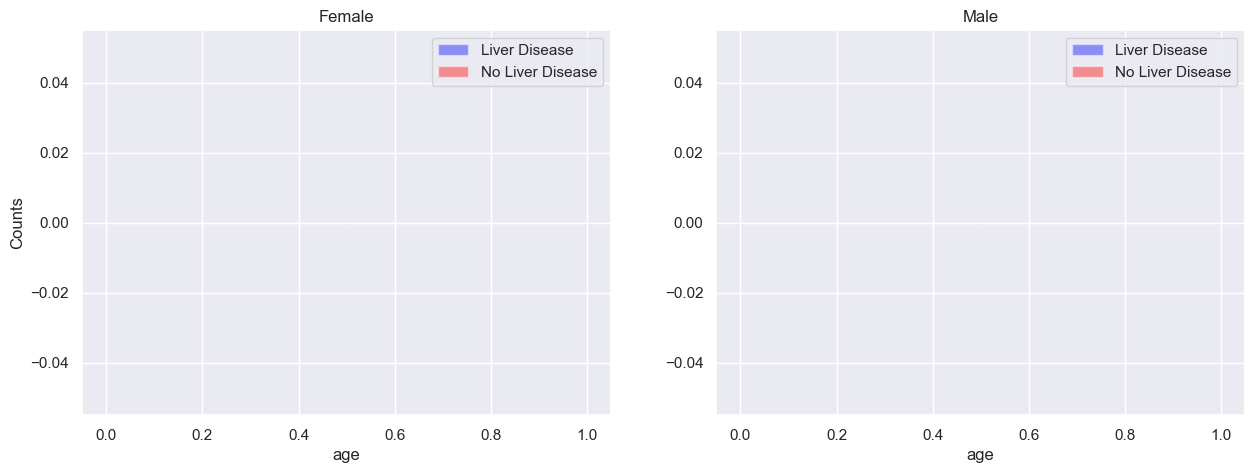

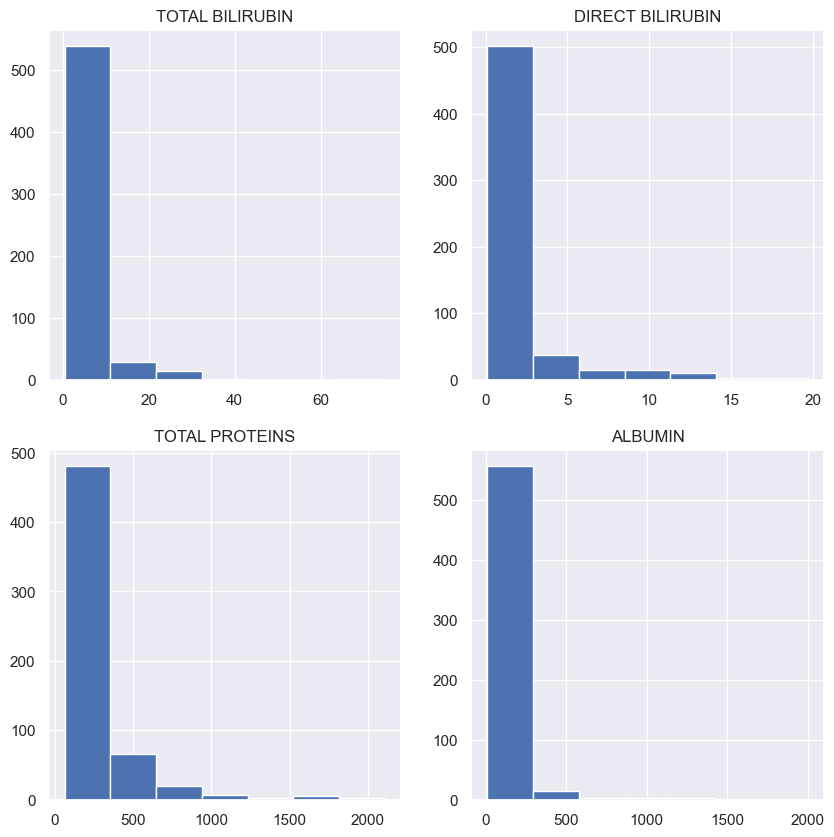

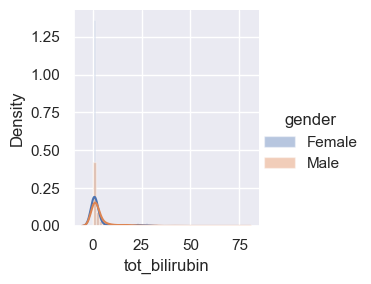

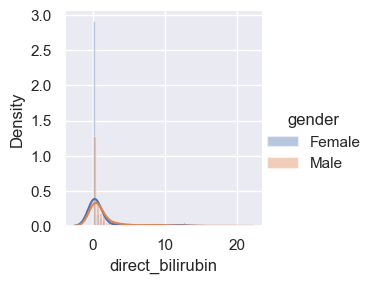

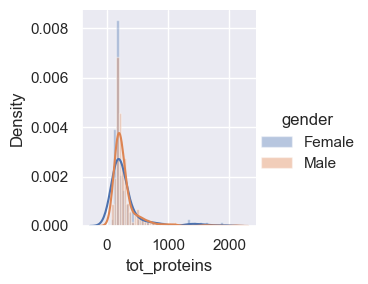

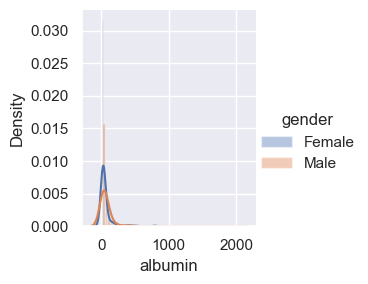

In [32]:
plot=sns.FacetGrid(df_liver,hue="gender")
plot.map(sns.distplot,"tot_bilirubin").add_legend()

plot=sns.FacetGrid(df_liver,hue="gender")
plot.map(sns.distplot,"direct_bilirubin").add_legend()

plot=sns.FacetGrid(df_liver,hue="gender")
plot.map(sns.distplot,"tot_proteins").add_legend()

plot=sns.FacetGrid(df_liver,hue="gender")
plot.map(sns.distplot,"albumin").add_legend()

plt.show()

#### Result Analysis:

From the above plots, we can see that-


- In this case of Total Bilirubin,there is very little amount of overlapping
- In this case of Direct Bilirubin,there is little amount of overlapping
- In this case of Total Protein,there is huge amount of overlapping
- In this case of albumin,there is huge amount of overlapping

# Scatter Plot

A scatter plot is a type of plot or mathematical diagram using cartesian coordinates to display values for typically two variables for a set of data

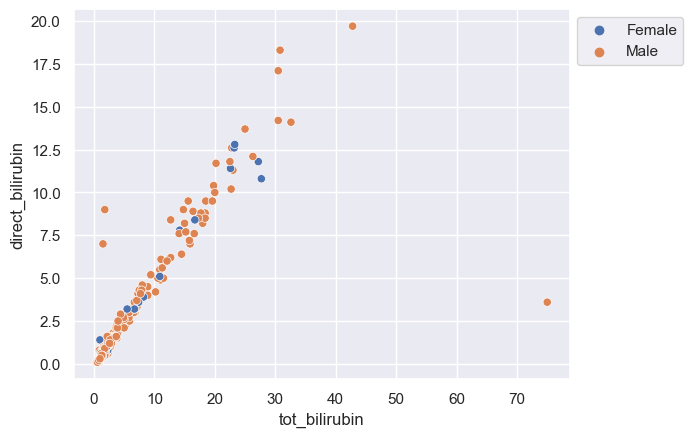

In [33]:
sns.scatterplot(x='tot_bilirubin',y='direct_bilirubin',hue='gender',data=df_liver)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

#### Result Analysis:

From the above plot,we can infer that-

- In gender, Male has larger tot_bilirubin as well as larger direct_bilirubin
- In gender, Female has smaller tot_bilirubin but not much larger direct_billirubin

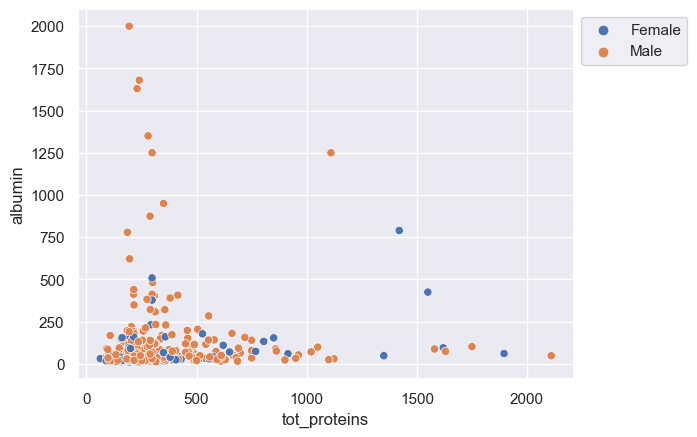

In [34]:
sns.scatterplot(x='tot_proteins',y='albumin',hue='gender',data=df_liver)
# Placing legend outside the figure
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

#### Result Analysis:

From the above plot,we can infer that-

- In gender,Male has larger Total_Proteins as well as highest Albumin
- In gender,Female has larger Total_Proteins but lesser albumin

# Pair Plot

For multivariate analysis

In [35]:
sns.pairplot(df_liver.drop(['age'],axis=1),hue='gender',height=2)

# Box Plot

We can use boxplots to see how the categorical value os distributed with other numerical values.

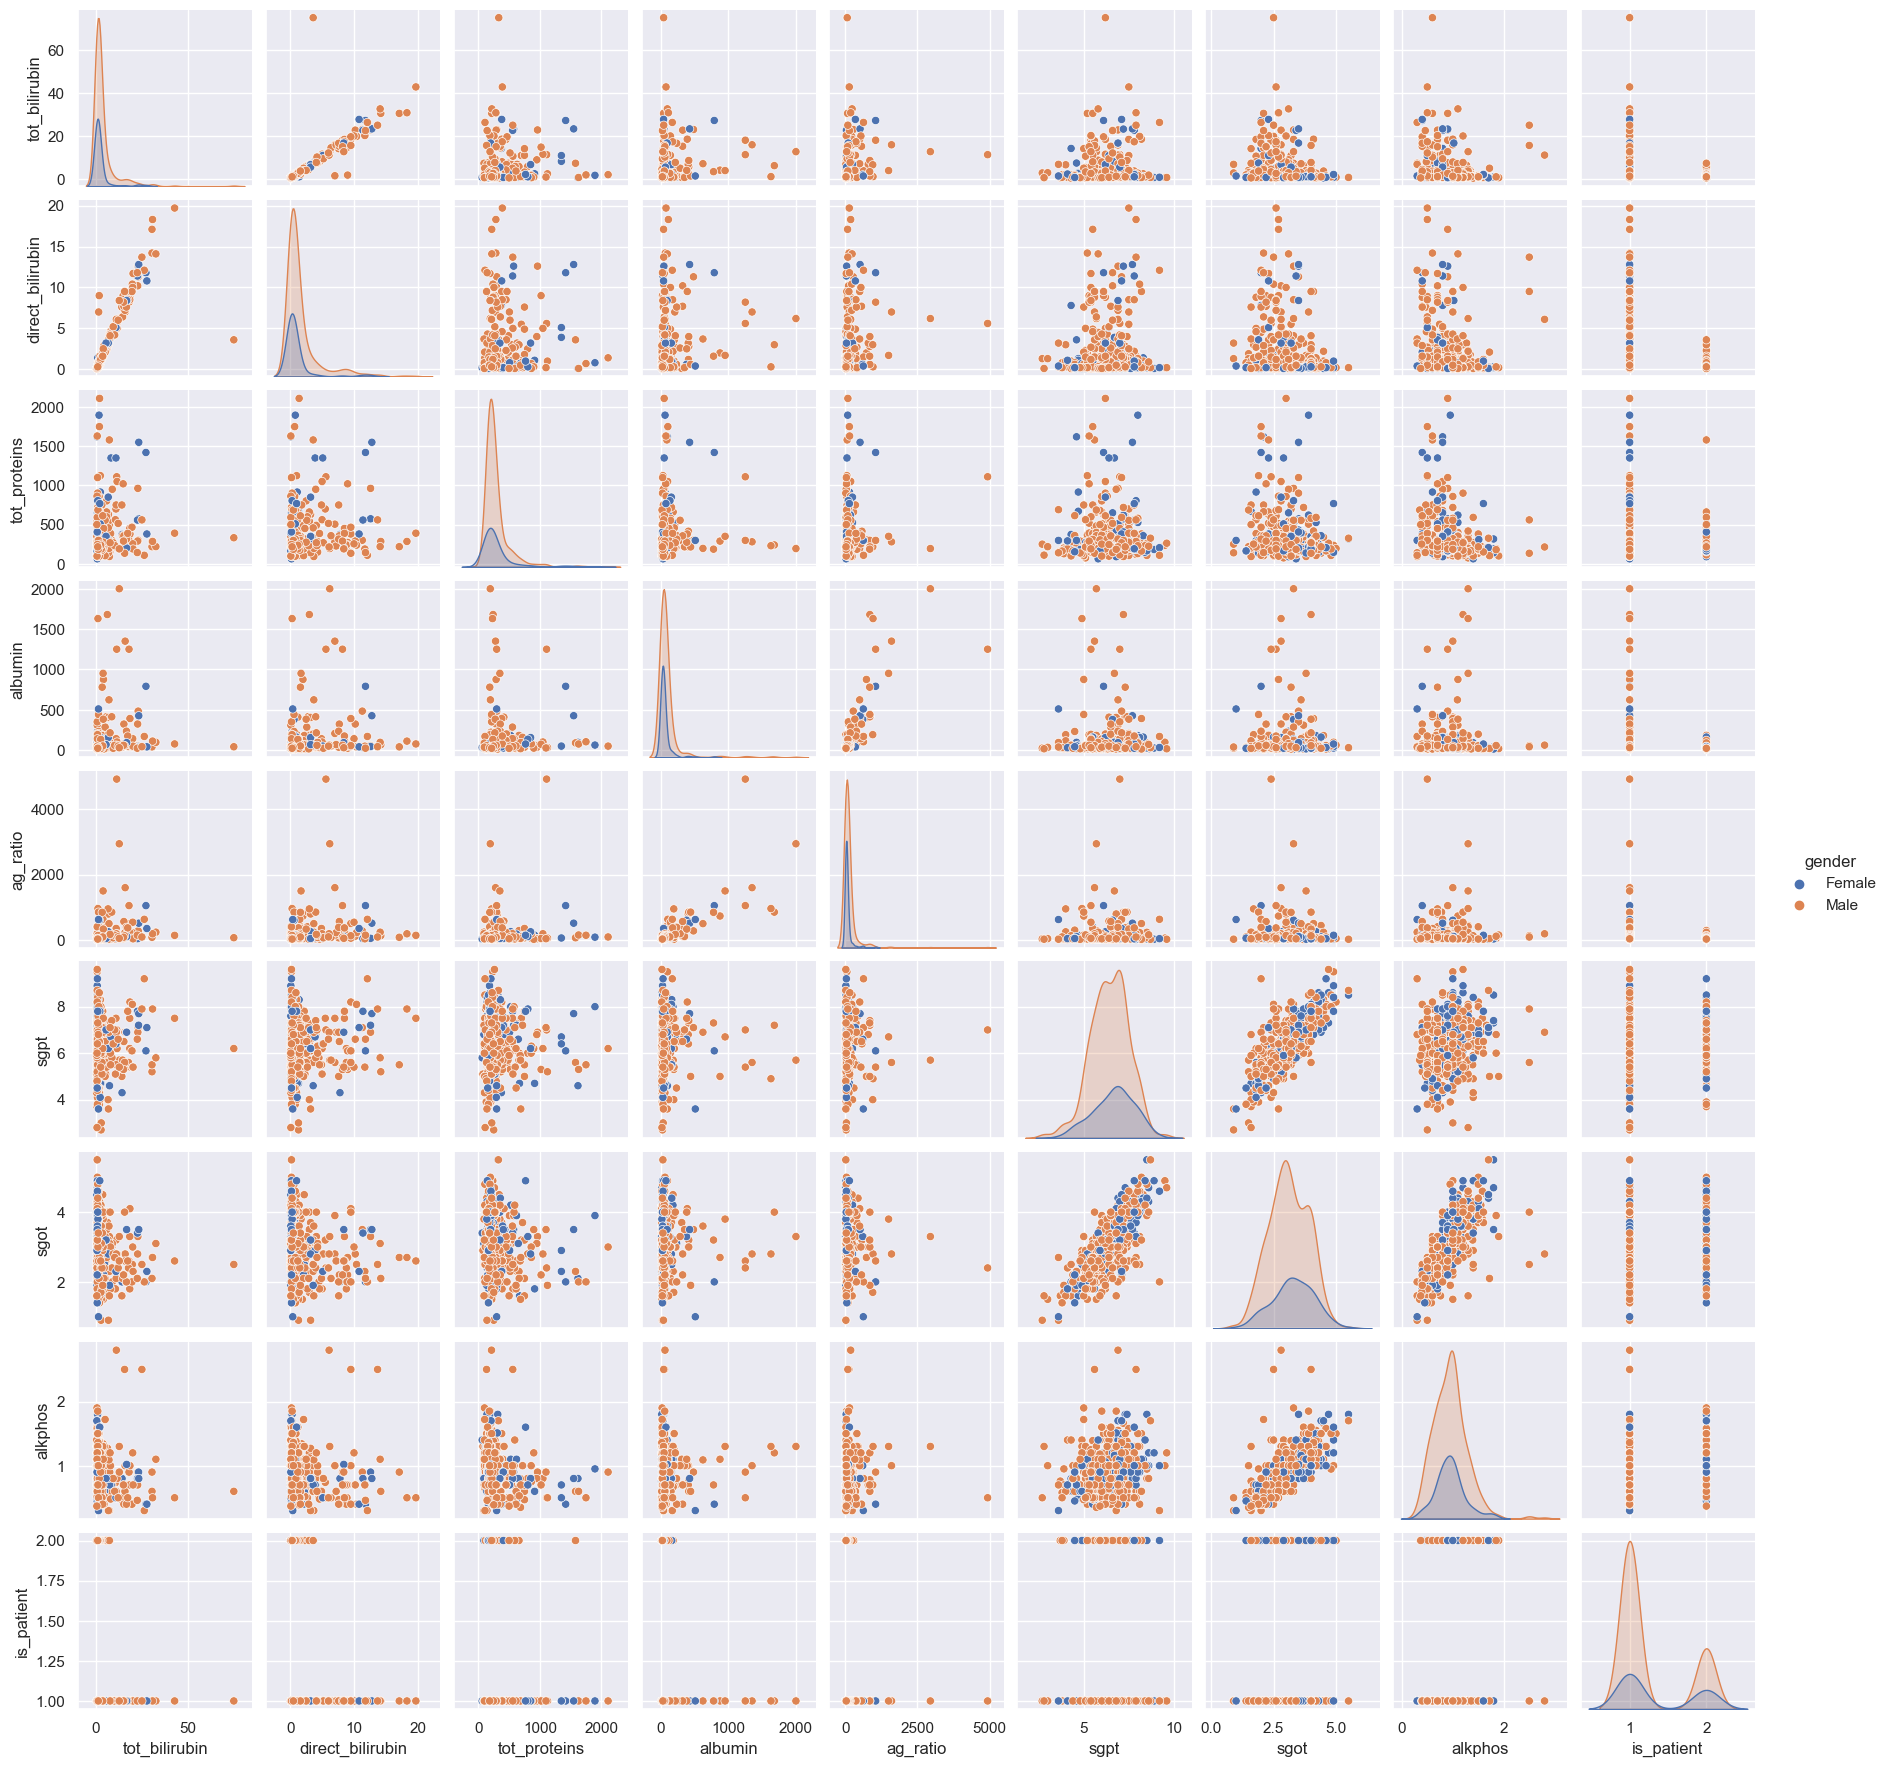

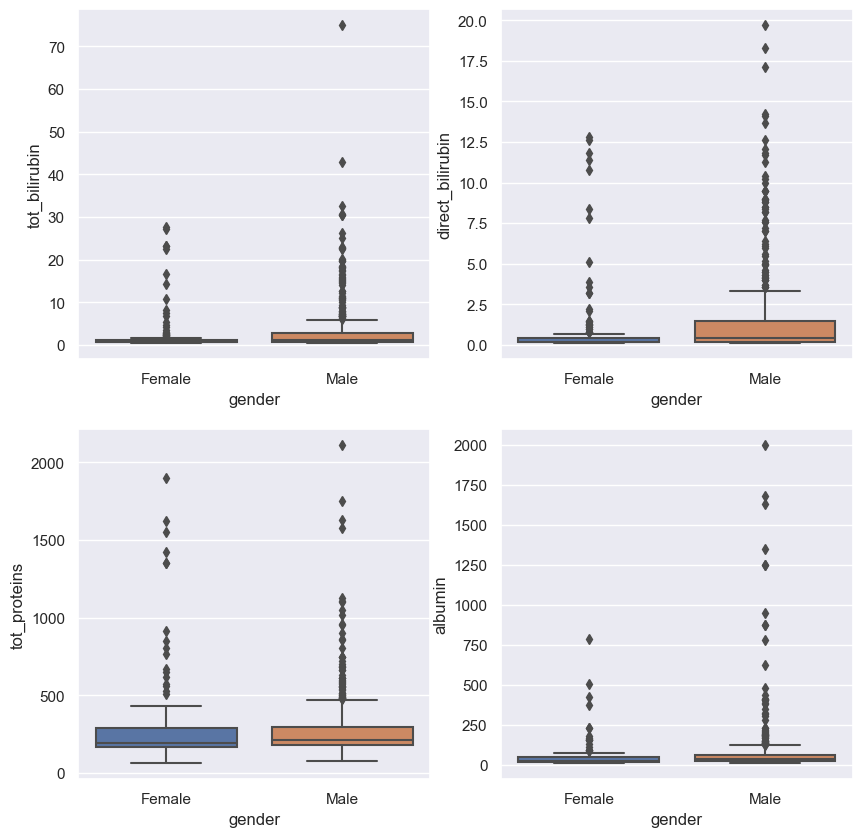

In [36]:
def graph(y):
    sns.boxplot(x='gender',y=y,data=df_liver)
plt.figure(figsize=(10,10))
plt.subplot(221)
graph('tot_bilirubin')

plt.subplot(222)
graph('direct_bilirubin')

plt.subplot(223)
graph('tot_proteins')

plt.subplot(224)
graph('albumin')

plt.show()

#### Result Analysis:

From the above graph,we can see that-

- In gender,Female has the smallest features and less distributed with some outliers
- In gender,Male has the highest features and more distributed with some outliers

# Heat Maps

The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically,it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above found correlation using the heatmaps

In [37]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_liver)

#### Result Analysis:

From the above heatmap we conclude that-

- tot_bilirubin and direct_bilirubin has very high correlations.
- ag_ratio and albumin, sgpt and sgot, alkphos and sgot are having high correlations.
- sgot and age has very good correlations.
- patient and direct_bilirubin, alkphos and tot_proteins, alkphos and age, alkphos and tot_bilirubin, sgot and direct_bilirubin, sgot and tot_bilirun, alkphos and direct bilirubin are having good correlations.

# Image Visualization with Matplotlib

In [40]:
im=plt.imread('liver.jpg')
plt.imshow(im)

In [39]:
plt.imshow(im[50:100,50:300])

# Conclusion

The above dataset is about the liver disease dataset.This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

### Acknowledgements

- The data set has been elicit from UCI Machine Learning Repository. My sincere thanks to them.

# Bibilography

### Websites

- www.kaggle.com(http://www.kaggle.com)
- www.youtube.com(http://www.youtube.com)
- www.wikipedia.com(http://www.wikipedia.com)